<a href="https://colab.research.google.com/github/YolandaMDavis/cs109a-fall2020/blob/yolanda-eda/Violent_Crime_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
DATA_ROOT = '/content/drive/My Drive/Final-Project-for-CS109a/data_prelim/'

In [3]:
new_york_crime_covid_df = pd.read_csv(DATA_ROOT + 'new_york_crime_covid_yolanda.csv').set_index('CMPLNT_NUM').drop(columns=["Unnamed: 0"])
new_york_crime_covid_df.head()

,BOROUGH,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,OFFENSE_DESCRIPTION,PD_DESC,RPT_DT,Latitude,Longitude,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,COVID_CASE_COUNT,TOTAL_COVID_TESTS,PERCENT_POSITIVE_TESTS,VIOLENT_CRIME,OFFENSE_TYPE,GEOHASH,COVID_PERIOD
CMPLNT_NUM,,,,,,,,,,,,,,,,,,,,,
843609180,BRONX,08/24/2020,20:57:00,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",08/24/2020,40.832826,-73.867539,2020,8,24,Monday,20,55198.0,489908.0,0.11267,0,Harassment,dr72r17k3w6x,1
702473966,BRONX,09/23/2020,18:50:00,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 1,CIVILIAN",09/23/2020,40.808451,-73.926321,2020,9,23,Wednesday,18,55198.0,489908.0,0.11267,0,Harassment,dr72jubqryef,1
708300720,BRONX,09/25/2020,15:00:00,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 1,CIVILIAN",09/25/2020,40.811410,-73.927712,2020,9,25,Friday,15,55198.0,489908.0,0.11267,0,Harassment,dr72jtrrxqq9,1
577206559,BRONX,09/28/2020,13:00:00,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",09/28/2020,40.899198,-73.858230,2020,9,28,Monday,13,55198.0,489908.0,0.11267,0,Harassment,dr72xm6p4e0j,1
298610543,BRONX,09/26/2020,23:00:00,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 1,CIVILIAN",09/26/2020,40.830722,-73.827126,2020,9,26,Saturday,23,55198.0,489908.0,0.11267,0,Harassment,dr782108pq2c,1


In [4]:
boston_crime_covid_df = pd.read_csv(DATA_ROOT + 'boston_crime_covid_yolanda.csv').set_index(['INCIDENT_NUMBER','OFFENSE_CODE']).drop(columns=["Unnamed: 0","SHOOTING"])
boston_crime_covid_df.head()

,,OFFENSE_DESCRIPTION,DISTRICT,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,LATITUDE,LONGITUDE,LOCATION,COVID_POSITIVE_COUNT,COVID_TESTED_COUNT,COVID_POSITIVE_RATE,VIOLENT_CRIME,OFFENSE_TYPE,COVID_PERIOD,GEOHASH
INCIDENT_NUMBER,OFFENSE_CODE,,,,,,,,,,,,,,,,,,
S97333701,3301,VERBAL DISPUTE,C6,2020-07-18 14:34:00,2020,7,Saturday,14,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)",773.15,16450.0,0.047,0,Other,1,drt2z4jfz5kp
I192075514,3301,VERBAL DISPUTE,C6,2019-09-19 16:14:00,2019,9,Thursday,16,GENERAL LAWRENCE J LOGAN,42.327204,-71.053189,"(42.32720403, -71.05318949)",NaN,NaN,NaN,0,Other,0,drt2z1ktudty
I192075282,3301,VERBAL DISPUTE,C6,2019-09-18 23:35:00,2019,9,Wednesday,23,MOUNT VERNON ST,42.317794,-71.042110,"(42.31779354, -71.04210959)",NaN,NaN,NaN,0,Other,0,drt2xrsxnb7x
I192075034,3301,VERBAL DISPUTE,C6,2019-09-18 09:41:00,2019,9,Wednesday,9,ELLERY ST,42.330692,-71.058261,"(42.33069205, -71.05826064)",NaN,NaN,NaN,0,Other,0,drt2z40fnsbt
I192072929,3301,VERBAL DISPUTE,C6,2019-09-11 17:01:00,2019,9,Wednesday,17,COLUMBIA RD,42.330116,-71.050728,"(42.33011606, -71.05072812)",NaN,NaN,NaN,0,Other,0,drt2z1yqy191


In [5]:
boston_crime_socio_eco_df = pd.read_csv(DATA_ROOT + 'boston_crime_james.csv').set_index(['INCIDENT_NUMBER','OFFENSE_CODE'])
boston_crime_socio_eco_df.head()

,,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,WHITE,BLACK,HISPANIC,ASIAN,OTHER,16-19-EMPLOYMENT,20-34-EMPLOYMENT,MEDIAN_INCOME,GEOHASH,LOCAL_PROP_VALUES
INCIDENT_NUMBER,OFFENSE_CODE,,,,,,,,,,,,,,,,,,,,,,,
S97333701,3301,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)",0.79193,0.045022,0.069712,0.074954,0.018382,0.38985,0.888016,121877.555,drt2z4jfz5kp,4.430931e+06
I20210846,3201,PROPERTY - LOST/ MISSING,C6,206,0,2020-02-09 00:30:00,2020,2,Sunday,0,SEAPORT BLVD,42.352756,-71.047481,"(42.35275600, -71.04748100)",0.79193,0.045022,0.069712,0.074954,0.018382,0.38985,0.888016,121877.555,drt2zq0f9tyq,2.996402e+07
I20207883,3115,INVESTIGATE PERSON,C6,914,0,2020-04-18 17:11:00,2020,4,Saturday,17,OLD COLONY AVE,42.325573,-71.052481,"(42.32557300, -71.05248100)",0.79193,0.045022,0.069712,0.074954,0.018382,0.38985,0.888016,121877.555,drt2z1jhm4wj,1.417106e+07
I192078622,619,LARCENY ALL OTHERS,C6,201,NaN,2019-09-29 03:04:00,2019,9,Sunday,3,W BROADWAY,42.340070,-71.052794,"(42.34006986, -71.05279420)",0.79193,0.045022,0.069712,0.074954,0.018382,0.38985,0.888016,121877.555,drt2z5ubvchd,3.620904e+07
I192078606,3201,PROPERTY - LOST,C6,200,NaN,2019-09-29 02:21:00,2019,9,Sunday,2,W BROADWAY,42.341288,-71.054679,"(42.34128751, -71.05467933)",0.79193,0.045022,0.069712,0.074954,0.018382,0.38985,0.888016,121877.555,drt2z5gxcunf,3.620904e+07


In [6]:
boston_elws_df = pd.read_csv(DATA_ROOT + 'boston_crime_Election_locations_weather_sunset_ramzi.csv')
boston_elws_df.head()

,OFFENSE_DESCRIPTION,DISTRICT,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,VIOLENT_CRIME,OFFENSE_TYPE,DATE,TIME,Streetlight_density,Police_Station_Distance,Hospitals_Distance,College_Univ_Distance,PRCP,SNOW,NIGHT
0,VERBAL DISPUTE,C6,2020-07-18 14:34:00,2020,7,Saturday,14,42.330813,-71.051368,0,Other,2020-07-18,14:34:00,15.0,1189.301193,1746.645888,1726.855499,0.0,0.0,0
1,VERBAL DISPUTE,E13,2020-07-18 11:16:00,2020,7,Saturday,11,42.314333,-71.097914,0,Other,2020-07-18,11:16:00,24.0,754.880893,652.705979,1669.434788,0.0,0.0,0
2,VERBAL DISPUTE,C11,2020-07-18 17:45:00,2020,7,Saturday,17,42.284398,-71.064683,0,Other,2020-07-18,17:45:00,20.0,1587.437514,779.885128,780.049628,0.0,0.0,0
3,VERBAL DISPUTE,C11,2020-07-18 14:25:00,2020,7,Saturday,14,42.299999,-71.053836,0,Other,2020-07-18,14:25:00,2.0,484.362360,2693.577200,1951.543201,0.0,0.0,0
4,VERBAL DISPUTE,C11,2020-07-18 12:13:00,2020,7,Saturday,12,42.300706,-71.068583,0,Other,2020-07-18,12:13:00,17.0,833.071029,2600.218236,2608.333480,0.0,0.0,0


In [7]:
new_york_elws_df = pd.read_csv(DATA_ROOT + 'nyc_election_locations_weather_sunset_ramzi_V2.csv').set_index(["CMPLNT_NUM"]).drop(columns=["Unnamed: 0"])
new_york_elws_df.head()

,BOROUGH,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,OFFENSE_DESCRIPTION,PD_DESC,RPT_DT,Latitude,Longitude,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,Streetlight_density,Police_Station_Distance,Hospitals_Distance,College_Univ_Distance,NIGHT,DATE,PRCP,SNOW,election,VIOLENT_CRIME,OFFENSE_TYPE
CMPLNT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,
843609180,BRONX,08/24/2020,20:57:00,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",08/24/2020,40.832826,-73.867539,2020,8,24,Monday,20,1.0,1101.449779,2566.906882,3579.728371,1,2020-08-24,0.0,0.0,0.11,0,Harassment
397173953,BRONX,08/24/2020,20:45:00,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",08/24/2020,40.859596,-73.866058,2020,8,24,Monday,20,6.0,1554.701811,1724.841440,1651.516065,1,2020-08-24,0.0,0.0,0.11,0,Harassment
308319126,MANHATTAN,08/24/2020,18:30:00,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 1,CIVILIAN",08/24/2020,40.830532,-73.941520,2020,8,24,Monday,18,2.0,266.760327,978.093941,498.194892,0,2020-08-24,0.0,0.0,0.11,0,Harassment
133816979,BROOKLYN,08/24/2020,22:20:00,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",08/24/2020,40.670054,-73.921175,2020,8,24,Monday,22,0.0,650.723444,1037.813543,2343.992432,1,2020-08-24,0.0,0.0,0.22,0,Harassment
284953252,BROOKLYN,08/24/2020,12:25:00,VIOLATION,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",08/24/2020,40.638045,-73.953197,2020,8,24,Monday,12,3.0,1206.812719,1710.849559,808.914269,0,2020-08-24,0.0,0.0,0.22,0,Harassment


In [8]:
new_york_socio_econ_df = pd.read_csv(DATA_ROOT + 'borougharea_demographics_paolo.csv')
new_york_socio_econ_df

,Sub-Borough Area,Year,Pct_Population_asian,Pct_Population_black,Pct_Population_white,Pct_Population_hispanic,Labor_Participation,Poverty_Rate,Median_Income
0,Washington Heights/Inwood,2000,0.020430,0.083872,0.135509,0.740900,NaN,NaN,47146.440678
1,East Harlem,2000,0.027332,0.348704,0.073471,0.528402,NaN,NaN,36145.604520
2,Mott Haven/Hunts Point,2000,0.004416,0.244511,0.012963,0.724611,NaN,NaN,27502.090395
3,Morrisania/Belmont,2000,0.008088,0.344518,0.054261,0.573032,NaN,NaN,29073.638418
4,Highbridge/South Concourse,2000,0.012277,0.365367,0.014700,0.581517,NaN,NaN,35988.449718
...,...,...,...,...,...,...,...,...,...
805,Jamaica,2018,0.133101,0.622719,0.021636,0.147285,0.642270,0.642270,65292.671361
806,Queens Village,2018,0.177454,0.566763,0.095089,0.115413,0.627211,0.627211,92918.878794
807,Rockaways,2018,0.046571,0.356762,0.355713,0.217676,0.615616,0.615616,61652.481171
808,North Shore,2018,0.102643,0.213005,0.373664,0.287865,0.580466,0.580466,74357.060060


In [9]:
print(new_york_elws_df["BOROUGH"].unique())

['BRONX' 'MANHATTAN' 'BROOKLYN' 'QUEENS' 'STATEN ISLAND']


In [10]:
print(new_york_socio_econ_df["Sub-Borough Area"].unique())

['Washington Heights/Inwood' 'East Harlem' 'Mott Haven/Hunts Point'
 'Morrisania/Belmont' 'Highbridge/South Concourse'
 'University Heights/Fordham' 'Kingsbridge Heights/Mosholu'
 'Riverdale/Kingsbridge' 'Soundview/Parkchester' 'Throgs Neck/Co-op City'
 'Pelham Parkway' 'Williamsbridge/Baychester' 'Williamsburg/Greenpoint'
 'Brooklyn Heights/Fort Greene' 'Bedford Stuyvesant' 'Bushwick'
 'East New York/Starrett City' 'Greenwich Village/Financial District'
 'Lower East Side/Chinatown' 'Chelsea/Clinton/Midtown'
 'Stuyvesant Town/Turtle Bay' 'Upper West Side' 'Upper East Side'
 'Morningside Heights/Hamilton Heights' 'Central Harlem'
 'Park Slope/Carroll Gardens' 'Sunset Park'
 'North Crown Heights/Prospect Heights' 'South Crown Heights' 'Bay Ridge'
 'Bensonhurst' 'Borough Park' 'Coney Island' 'Flatbush'
 'Sheepshead Bay/Gravesend' 'Brownsville/Ocean Hill' 'East Flatbush'
 'Flatlands/Canarsie' 'Astoria' 'Sunnyside/Woodside' 'Jackson Heights'
 'Elmhurst/Corona' 'Middle Village/Ridgewood' 'Re

In [11]:
crime_covid_df = boston_crime_covid_df[["DISTRICT","YEAR","MONTH","DAY_OF_WEEK","HOUR","LATITUDE","LONGITUDE","COVID_PERIOD","VIOLENT_CRIME","OFFENSE_TYPE"]]
crime_socio_eco_df = boston_crime_socio_eco_df[["WHITE","BLACK","HISPANIC","ASIAN","OTHER","16-19-EMPLOYMENT","20-34-EMPLOYMENT","MEDIAN_INCOME","GEOHASH","LOCAL_PROP_VALUES"]]
boston_crime_analysis_data_df = crime_covid_df.join(crime_socio_eco_df)
boston_crime_analysis_data_df.head()

,,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,LATITUDE,LONGITUDE,COVID_PERIOD,VIOLENT_CRIME,OFFENSE_TYPE,WHITE,BLACK,HISPANIC,ASIAN,OTHER,16-19-EMPLOYMENT,20-34-EMPLOYMENT,MEDIAN_INCOME,GEOHASH,LOCAL_PROP_VALUES
INCIDENT_NUMBER,OFFENSE_CODE,,,,,,,,,,,,,,,,,,,,
102096818,3126,A1,2019,11,Saturday,21,42.360866,-71.061316,0,0,Warrant,0.727176,0.030437,0.080069,0.140236,0.022081,0.198180,0.827472,89833.4675,drt2yzw9zmf2,3.901778e+07
120200013,2403,A1,2020,1,Wednesday,1,42.364167,-71.054070,0,0,Other,0.727176,0.030437,0.080069,0.140236,0.022081,0.198180,0.827472,89833.4675,drt3p0hj0jj7,1.557071e+06
120200242,3115,D4,2020,1,Sunday,0,42.339541,-71.069408,0,0,Other,0.654461,0.062627,0.107735,0.144875,0.030302,0.417109,0.725266,65903.7975,drt2yg8vdy2r,2.688223e+07
129099920,3301,B2,2019,12,Thursday,7,NaN,NaN,0,0,Other,0.272019,0.336937,0.250297,0.110655,0.030092,0.437154,0.710761,31714.3350,000000000000,0.000000e+00
129099936,1106,B2,2019,11,Friday,6,42.329748,-71.084540,0,0,Forgery/Fraud,0.272019,0.336937,0.250297,0.110655,0.030092,0.437154,0.710761,31714.3350,drt2y3vudhvq,3.028129e+06


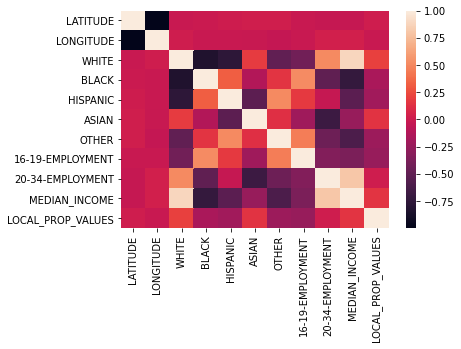

In [12]:
# Do we have any correlated data that we'll need to look out for?
crime_corr = boston_crime_analysis_data_df.drop(columns=["YEAR","MONTH","DAY_OF_WEEK","HOUR","COVID_PERIOD","VIOLENT_CRIME"]).corr()
ax = sns.heatmap(crime_corr)

In [13]:
boston_crime_analysis_data_df.dropna(subset=['LATITUDE','LONGITUDE'], inplace=True)

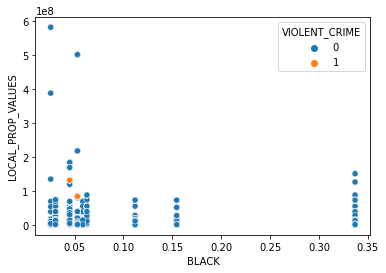

In [14]:
sns.scatterplot(data=boston_crime_analysis_data_df, x="BLACK", y="LOCAL_PROP_VALUES", hue="VIOLENT_CRIME")

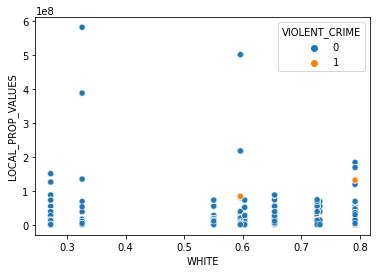

In [15]:
sns.scatterplot(data=boston_crime_analysis_data_df, x="WHITE", y="LOCAL_PROP_VALUES", hue="VIOLENT_CRIME")

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


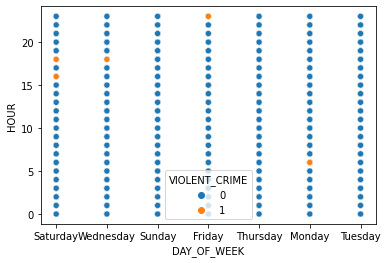

In [16]:
sns.scatterplot(data=boston_crime_analysis_data_df, x="DAY_OF_WEEK", y="HOUR", hue="VIOLENT_CRIME")

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


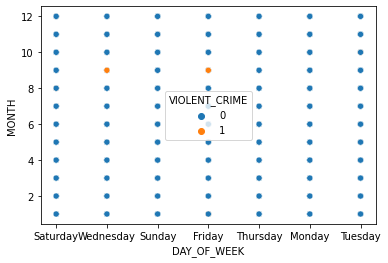

In [17]:
sns.scatterplot(data=boston_crime_analysis_data_df, x="DAY_OF_WEEK", y="MONTH", hue="VIOLENT_CRIME")

In [18]:
# Create some Train and Test data for boston_crime
from sklearn.model_selection import train_test_split

boston_crime_train, boston_crime_test = train_test_split(boston_crime_analysis_data_df, train_size=.8, random_state = 109)

train_offenses = boston_crime_train['VIOLENT_CRIME'].count()
train_violent_crime = boston_crime_train[boston_crime_train["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
train_proportion_violent = round(train_violent_crime/train_offenses, 3)
train_accuracy = round(1 - train_proportion_violent,3)

test_offenses = boston_crime_test['VIOLENT_CRIME'].count()
test_violent_crime = boston_crime_test[boston_crime_test["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
test_proportion_violent = round(test_violent_crime/test_offenses, 3)
test_accuracy = round(1 - test_proportion_violent,3)

print(f"Proportion of violent crime: {train_proportion_violent}")
print(f"Naive Model Train Accuracy when classifying all offenses as not violent: {train_accuracy}")
print(f"Naive Model Test Accuracy when classifying all offenses as not violent: {test_accuracy}")


Proportion of violent crime: 0.074
Naive Model Train Accuracy when classifying all offenses as not violent: 0.926
Naive Model Test Accuracy when classifying all offenses as not violent: 0.926


This naive model was based on the training set violent crime proportion and it assumes that no crimes are violent since the proportion of violent crimes are below 0.5. This will be used to compare the success for other models


In [19]:
# Creating Dummy variables for LOTS of categories
category_columns = ['DISTRICT', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'OFFENSE_TYPE']
train_crime_dummies_df = pd.get_dummies(boston_crime_train, columns=category_columns)
test_crime_dummies_df = pd.get_dummies(boston_crime_test, columns=category_columns)



In [20]:
train_crime_dummies_df.head()

,,LATITUDE,LONGITUDE,COVID_PERIOD,VIOLENT_CRIME,WHITE,BLACK,HISPANIC,ASIAN,OTHER,16-19-EMPLOYMENT,20-34-EMPLOYMENT,MEDIAN_INCOME,GEOHASH,LOCAL_PROP_VALUES,DISTRICT_A1,DISTRICT_A15,DISTRICT_A7,DISTRICT_B2,DISTRICT_C6,DISTRICT_D14,DISTRICT_D4,DISTRICT_E13,DISTRICT_E5,YEAR_2015,YEAR_2016,YEAR_2017,YEAR_2018,YEAR_2019,YEAR_2020,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,...,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23,OFFENSE_TYPE_Animal Crime,OFFENSE_TYPE_Assault and/or Battery,OFFENSE_TYPE_Child Abuse/Endangerment,OFFENSE_TYPE_Drugs/Alcohol,OFFENSE_TYPE_Forgery/Fraud,OFFENSE_TYPE_Harassment,OFFENSE_TYPE_Kidnapping,OFFENSE_TYPE_MV Accident/Property Damage,OFFENSE_TYPE_Missing Person,OFFENSE_TYPE_Murder/Manslaughter/Homocide,OFFENSE_TYPE_Other,OFFENSE_TYPE_Prisoner Offense,OFFENSE_TYPE_Prostitution,OFFENSE_TYPE_Sex Offense,OFFENSE_TYPE_Theft/Robbery/B&E,OFFENSE_TYPE_Val,OFFENSE_TYPE_Violation of Order,OFFENSE_TYPE_Warrant,OFFENSE_TYPE_Weapon
INCIDENT_NUMBER,OFFENSE_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
I172034511,802,42.345903,-71.069463,0,1,0.654461,0.062627,0.107735,0.144875,0.030302,0.417109,0.725266,65903.7975,drt2yubfc2rq,5.496898e+07,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
202079865,3006,42.351867,-71.122905,1,0,0.596113,0.052914,0.123206,0.188024,0.039743,0.391525,0.716235,54511.9800,drt2vtcvs0np,1.340246e+07,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
I192001261,3831,42.326398,-71.111526,0,0,0.550542,0.111894,0.237167,0.061581,0.038816,0.469109,0.853052,84445.9000,drt2vc61jkdc,1.145043e+07,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
I182086500,3114,42.325475,-71.102535,0,0,0.550542,0.111894,0.237167,0.061581,0.038816,0.469109,0.853052,84445.9000,drt2y10eyb7r,1.048415e+07,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
202017344,3831,42.327291,-71.091590,0,0,0.272019,0.336937,0.250297,0.110655,0.030092,0.437154,0.710761,31714.3350,drt2y32wmfum,3.028129e+06,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#Looking at our data we probably should normalize it, especially with local property values scale vs employment rates and lat/log involved
from sklearn.preprocessing import MinMaxScaler
x_columns = train_crime_dummies_df.drop(columns=["VIOLENT_CRIME","GEOHASH"]).columns

X_train = train_crime_dummies_df[x_columns]
X_test = test_crime_dummies_df[x_columns]

scaler = MinMaxScaler()
scaler.fit(X_train)
x_train_norm = scaler.transform(X_train)
x_test_norm = scaler.transform(X_test)


In [22]:
# Quick check with Logistic regression (no penalty)
from sklearn.linear_model import LogisticRegression

y_train = train_crime_dummies_df['VIOLENT_CRIME'].values
y_test = test_crime_dummies_df['VIOLENT_CRIME'].values

logit_full = LogisticRegression(penalty='none', max_iter = 1000)
logit_full.fit(x_train_norm,y_train)

logit_full_train_accuracy = round(logit_full.score(x_train_norm, y_train),3)
logit_full_test_accuracy = round(logit_full.score(x_test_norm, y_test),5)

b0 = round(logit_full.intercept_[0],3)
print(f"Logistic Regression Estimated Betas (B0): {b0}")

for i, k in enumerate(x_columns):
    print(f"Logistic Regression Estimated Beta {k} (B{i + 1}): { round(logit_full.coef_[0][i],3)}")

print(f"\nLogisitic Train Accuracy: {logit_full_train_accuracy}, Logistic Test Accuracy: {logit_full_test_accuracy}")





Logistic Regression Estimated Betas (B0): 5.826
Logistic Regression Estimated Beta LATITUDE (B1): -135.277
Logistic Regression Estimated Beta LONGITUDE (B2): -137.433
Logistic Regression Estimated Beta COVID_PERIOD (B3): 0.647
Logistic Regression Estimated Beta WHITE (B4): 2.326
Logistic Regression Estimated Beta BLACK (B5): 1.915
Logistic Regression Estimated Beta HISPANIC (B6): 2.193
Logistic Regression Estimated Beta ASIAN (B7): 2.677
Logistic Regression Estimated Beta OTHER (B8): 2.063
Logistic Regression Estimated Beta 16-19-EMPLOYMENT (B9): 2.332
Logistic Regression Estimated Beta 20-34-EMPLOYMENT (B10): 2.088
Logistic Regression Estimated Beta MEDIAN_INCOME (B11): 1.844
Logistic Regression Estimated Beta LOCAL_PROP_VALUES (B12): -0.983
Logistic Regression Estimated Beta DISTRICT_A1 (B13): 1.956
Logistic Regression Estimated Beta DISTRICT_A15 (B14): 0.344
Logistic Regression Estimated Beta DISTRICT_A7 (B15): 1.715
Logistic Regression Estimated Beta DISTRICT_B2 (B16): 2.131
Logist

We've definitely improved on the accuracy and could probably drop some irrelavent columns.  But we are cheating a bit with offense types in the data set. How well can we predict without having any crime information present?

In [23]:
demog_category_columns = ['DISTRICT', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']
train_crime_demog_dummies_df = pd.get_dummies(boston_crime_train.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)
test_crime_demog_dummies_df = pd.get_dummies(boston_crime_test.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)

x_columns = train_crime_demog_dummies_df.drop(columns=["VIOLENT_CRIME","GEOHASH"]).columns

X_train = train_crime_demog_dummies_df[x_columns]
X_test = test_crime_demog_dummies_df[x_columns]

demog_scaler = MinMaxScaler()
demog_scaler.fit(X_train)
x_train_norm = demog_scaler.transform(X_train)
x_test_norm = demog_scaler.transform(X_test)

y_train = train_crime_demog_dummies_df['VIOLENT_CRIME'].values
y_test = test_crime_demog_dummies_df['VIOLENT_CRIME'].values

demog_logit_full = LogisticRegression(penalty='none', max_iter = 1000)
demog_logit_full.fit(x_train_norm,y_train)

demog_logit_full_train_accuracy = round(demog_logit_full.score(x_train_norm, y_train),3)
demog_logit_full_test_accuracy = round(demog_logit_full.score(x_test_norm, y_test),3)

b0 = round(demog_logit_full.intercept_[0],3)
print(f"Logistic Regression Estimated Betas (B0): {b0}")

for i, k in enumerate(x_columns):
    print(f"Logistic Regression Estimated Beta {k} (B{i + 1}): { round(demog_logit_full.coef_[0][i],3)}")

print(f"\nLogisitic Train Accuracy: {demog_logit_full_train_accuracy}, Logistic Test Accuracy: {demog_logit_full_test_accuracy}")


Logistic Regression Estimated Betas (B0): -0.654
Logistic Regression Estimated Beta LATITUDE (B1): -0.531
Logistic Regression Estimated Beta LONGITUDE (B2): -0.127
Logistic Regression Estimated Beta COVID_PERIOD (B3): 0.171
Logistic Regression Estimated Beta WHITE (B4): -0.369
Logistic Regression Estimated Beta BLACK (B5): -0.119
Logistic Regression Estimated Beta HISPANIC (B6): -0.191
Logistic Regression Estimated Beta ASIAN (B7): -0.297
Logistic Regression Estimated Beta OTHER (B8): -0.336
Logistic Regression Estimated Beta 16-19-EMPLOYMENT (B9): -0.329
Logistic Regression Estimated Beta 20-34-EMPLOYMENT (B10): -0.33
Logistic Regression Estimated Beta MEDIAN_INCOME (B11): -0.236
Logistic Regression Estimated Beta LOCAL_PROP_VALUES (B12): -0.107
Logistic Regression Estimated Beta DISTRICT_A1 (B13): -0.106
Logistic Regression Estimated Beta DISTRICT_A15 (B14): -0.086
Logistic Regression Estimated Beta DISTRICT_A7 (B15): -0.151
Logistic Regression Estimated Beta DISTRICT_B2 (B16): -0.02

In [25]:
from sklearn.linear_model import LogisticRegressionCV
c_list = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]
folds = 5
training_score = []

logit_lasso= LogisticRegressionCV(Cs=c_list, penalty='l1',solver='liblinear', max_iter = 1000, scoring='accuracy',cv=folds)
logit_lasso.fit(x_train_norm, y_train)
logit_lasso_score_train = logit_lasso.score(x_train_norm, y_train)
logit_lasso_score_test = logit_lasso.score(x_test_norm, y_test)



In [26]:
print(
    "The regularization parameter C chosen by this model: {}\n"
    "Training Accuracy: {:.3f}\n"
    "Test Accuracy: {:.3f}\n"
    .format(logit_lasso.C_[0], logit_lasso_score_train, logit_lasso_score_test)
)

The regularization parameter C chosen by this model: 0.001
Training Accuracy: 0.926
Test Accuracy: 0.926



Not much improvement over the naive model.  We would definitely need more parameters to refine this a bit more or at least try a newer model

In [27]:
# Let's give adaboost a shot
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# we can use the unnormalized values this time
X_train = train_crime_demog_dummies_df[x_columns]
X_test = test_crime_demog_dummies_df[x_columns]

boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators=100, learning_rate=.05)
boost.fit(X_train, y_train)
train_boost_score = boost.score(X_train, y_train)
test_boost_score = boost.score(X_test, y_test)



In [28]:
print(f"Training Accuracy for boosting: {train_boost_score}")
print(f"Test Accuracy for boosting: {test_boost_score}")

Training Accuracy for boosting: 0.9259007951644611
Test Accuracy for boosting: 0.9255167759634992
